# STOR 320: Introduction to Data Science
## EDA Group 9

## Part 1: Data cleaning, merging, and visualization (6 points)

In [1032]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from geopy.distance import geodesic
import math



In [1033]:
flights = pd.read_csv('flights.csv')
hotel = pd.read_csv('hotel_bookings.csv')

In [1034]:
## column names check (1 point)
print(flights.columns)
hotel.columns

Index(['id', 'year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'name'],
      dtype='object')


Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [1035]:
## missing data check (1 point)
print(flights.isnull().sum())
hotel.isnull().sum()

id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

           arr_delay      dep_delay       distance       air_time
count  327346.000000  328521.000000  336776.000000  327346.000000
mean        6.895377      12.639070    1039.912604     150.686460
std        44.633292      40.210061     733.233033      93.688305
min       -86.000000     -43.000000      17.000000      20.000000
25%       -17.000000      -5.000000     502.000000      82.000000
50%        -5.000000      -2.000000     872.000000     129.000000
75%        14.000000      11.000000    1389.000000     192.000000
max      1272.000000    1301.000000    4983.000000     695.000000
           lead_time  previous_cancellations  previous_bookings_not_canceled  \
count  119390.000000           119390.000000                   119390.000000   
mean      104.011416                0.087118                        0.137097   
std       106.863097                0.844336                        1.497437   
min         0.000000                0.000000                        0.000000   
25%   

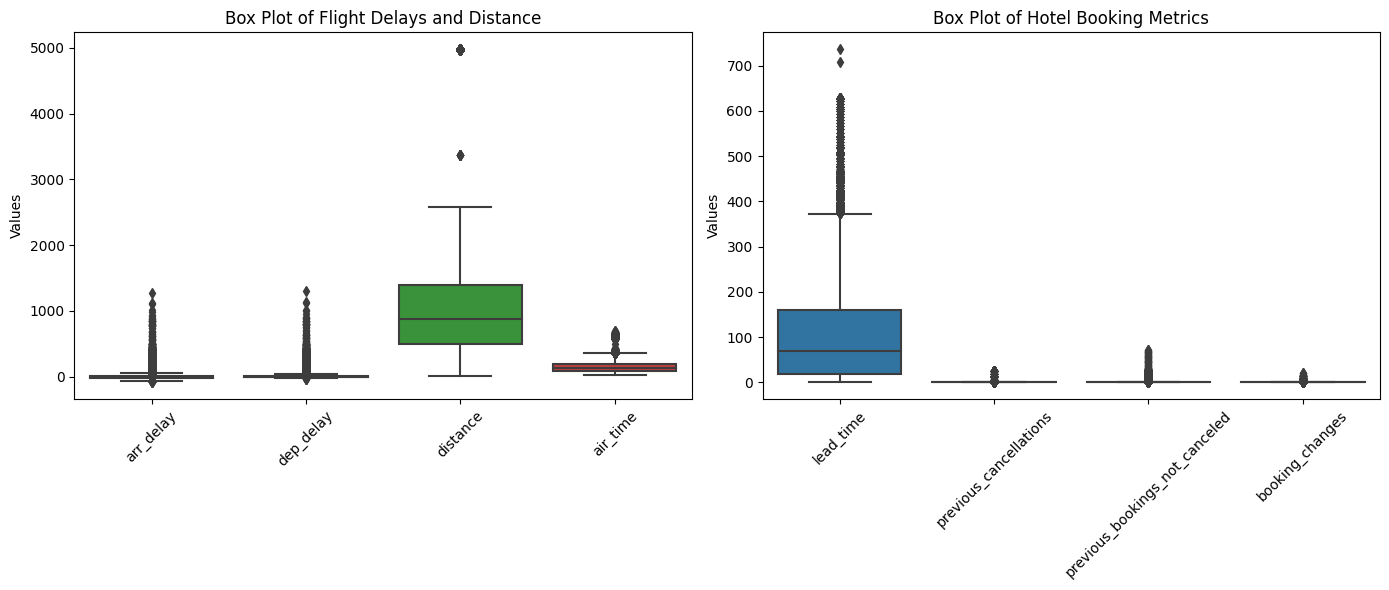

In [1036]:
## Outlier check (1 point)
print(flights.describe()[['arr_delay','dep_delay','distance','air_time']])
print(hotel.describe()[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes']])

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=flights[['arr_delay', 'dep_delay', 'distance', 'air_time']])
plt.title('Box Plot of Flight Delays and Distance')
plt.ylabel('Values')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.boxplot(data=hotel[['lead_time', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']])
plt.title('Box Plot of Hotel Booking Metrics')
plt.ylabel('Values')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [1037]:
## data merging (1 point)
month_mapping = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}
hotel['arrival_date_month_numeric'] = hotel['arrival_date_month'].map(month_mapping)

flights['month'] = flights['month'].astype(int)
flights['day'] = flights['day'].astype(int)
hotel['arrival_date_month_numeric'] = hotel['arrival_date_month_numeric'].astype(int)
hotel['arrival_date_day_of_month'] = hotel['arrival_date_day_of_month'].astype(int)
hotel['arrival_date_year'] = hotel['arrival_date_year'].astype(int)

hotel_filtered = hotel[
    (hotel['country'] == 'USA') & 
    (hotel['arrival_date_year'] == 2016)
]

merged_data = pd.merge(
    flights, hotel_filtered, 
    left_on=['month', 'day'], 
    right_on=['arrival_date_month_numeric', 'arrival_date_day_of_month'], 
    how='inner'
)
merged_data[['hour','origin','dest','time_hour','name']]

,hour,origin,dest,time_hour,name
0,5,EWR,IAH,2013-01-01 05:00:00,United Air Lines Inc.
1,5,LGA,IAH,2013-01-01 05:00:00,United Air Lines Inc.
2,5,JFK,MIA,2013-01-01 05:00:00,American Airlines Inc.
3,5,JFK,BQN,2013-01-01 05:00:00,JetBlue Airways
4,6,LGA,ATL,2013-01-01 06:00:00,Delta Air Lines Inc.
...,...,...,...,...,...
900718,11,LGA,CLE,2013-09-30 11:00:00,Envoy Air
900719,11,LGA,CLE,2013-09-30 11:00:00,Envoy Air
900720,8,LGA,RDU,2013-09-30 08:00:00,Envoy Air
900721,8,LGA,RDU,2013-09-30 08:00:00,Envoy Air


In [1038]:
## data transformation, normalization, and cleaning (1 point)

In [1039]:
merged_data.columns

Index(['id', 'year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'name', 'hotel', 'is_canceled', 'lead_time',
       'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date',
       'arrival_date_month_numeric'],
      dtype='obje

In [1040]:
merged_data = merged_data[[#'id', 
    'year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 
       #'flight','tailnum', 
       'origin', 'dest', 'air_time', 'distance',
        'hour', 'minute', 'time_hour', 
        'name', 
        
        'hotel', 'is_canceled', 'lead_time',
       'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 
       #'meal',
       'country', 
       'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 
       #'reserved_room_type',
       #'assigned_room_type', 
       'booking_changes', 
       'deposit_type', 
       #'agent',
       #'company', 
       'days_in_waiting_list', 'customer_type', 
       'adr',
       'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status',
       'reservation_status_date',
       'arrival_date_month_numeric']].dropna()
merged_data

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date_month_numeric
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,0,No Deposit,0,Transient,92.0,0,1,Check-Out,2016-01-03,1
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,0,No Deposit,0,Transient,92.0,0,1,Check-Out,2016-01-03,1
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,0,No Deposit,0,Transient,92.0,0,1,Check-Out,2016-01-03,1
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,0,No Deposit,0,Transient,92.0,0,1,Check-Out,2016-01-03,1
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,0,No Deposit,0,Transient,92.0,0,1,Check-Out,2016-01-03,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900700,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,...,0,No Deposit,0,Transient,136.0,1,1,Check-Out,2016-10-01,9
900701,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,...,1,No Deposit,0,Transient,215.0,0,0,Check-Out,2016-10-03,9
900702,2013,9,30,2349.0,2359,-10.0,325.0,350,-25.0,B6,...,0,No Deposit,0,Transient,139.0,0,0,Canceled,2016-07-23,9
900703,2013,9,30,2349.0,2359,-10.0,325.0,350,-25.0,B6,...,0,No Deposit,0,Transient,136.0,1,1,Check-Out,2016-10-01,9


In [1041]:
merged_data['arrival_date'] = pd.to_datetime(
    merged_data['arrival_date_year'].astype(str) + '-' +
    merged_data['arrival_date_month_numeric'].astype(str) + '-' +
    merged_data['arrival_date_day_of_month'].astype(str),
    errors='coerce'
)

merged_data.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month', 'arrival_date_month_numeric'], axis=1, inplace=True)

merged_data[['arrival_date']].head()

#makes a date time column

,arrival_date
0,2016-01-01
1,2016-01-01
2,2016-01-01
3,2016-01-01
4,2016-01-01


In [1042]:
merged_data['arrival_date'] = pd.to_datetime(merged_data['arrival_date'], errors='coerce')
merged_data['reservation_status_date'] = pd.to_datetime(merged_data['reservation_status_date'], errors='coerce')

#  Convers to data time

In [1043]:
merged_data['dep_time_full'] = pd.to_datetime(merged_data['arrival_date'].astype(str) + ' ' + 
                                              merged_data['hour'].astype(str) + ':' + 
                                              merged_data['minute'].astype(str), errors='coerce')

# Reformats to date time

In [1044]:
if 'dep_time' in merged_data.columns and 'sched_dep_time' in merged_data.columns:
    merged_data['dep_time'] = pd.to_datetime(merged_data['dep_time'], format='%H%M', errors='coerce')
    merged_data['sched_dep_time'] = pd.to_datetime(merged_data['sched_dep_time'], format='%H%M', errors='coerce')
    merged_data['dep_delay_calc'] = (merged_data['dep_time'] - merged_data['sched_dep_time']).dt.total_seconds() / 60

In [1045]:
if 'arr_time' in merged_data.columns and 'sched_arr_time' in merged_data.columns:
    merged_data['arr_time'] = pd.to_datetime(merged_data['arr_time'], format='%H%M', errors='coerce')
    merged_data['sched_arr_time'] = pd.to_datetime(merged_data['sched_arr_time'], format='%H%M', errors='coerce')
    merged_data['arr_delay_calc'] = (merged_data['arr_time'] - merged_data['sched_arr_time']).dt.total_seconds() / 60

# Calculate delays based on existing columns if dep_time and sched_dep_time are present as times

In [1046]:
continuous_features = ['dep_delay', 'arr_delay', 'lead_time', 'air_time', 'distance', 'days_in_waiting_list', 'adr']
scaler = StandardScaler()
merged_data[continuous_features] = scaler.fit_transform(merged_data[continuous_features])
#  Scales featues that may need tranformation

In [1047]:
categorical_features = [#'company',
     'carrier', 
                       # 'meal', 'country', 
                       'market_segment', 'distribution_channel'
                       #'reserved_room_type', 'assigned_room_type'
                       ]
merged_data = pd.get_dummies(merged_data, columns=categorical_features, drop_first=True)
#  Takes data and makes it into diffrent catigoireis for later analysis

In [1048]:
binary_features = ['is_canceled', 'is_repeated_guest']
merged_data[binary_features] = merged_data[binary_features].astype(int)
#  Turn binary data into binary (self expanitory)

In [1049]:
count_features = ['previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'total_of_special_requests']
merged_data[count_features] = scaler.fit_transform(merged_data[count_features])
	
# Calculates the mean and standard deviation then applies the transformation to the data using the parameters

In [1050]:
merged_data['total_guests'] = merged_data[['adults', 'children', 'babies']].sum(axis=1)
# Summing the total amounts of guests

In [1051]:
merged_data['reservation_status'] = merged_data['reservation_status'].astype('category').cat.codes
# Convert regitration status to numerical codes

In [1052]:
merged_data.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'origin', 'dest', 'air_time',
       'distance', 'hour', 'minute', 'time_hour', 'name', 'hotel',
       'is_canceled', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'country', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'arrival_date',
       'dep_time_full', 'dep_delay_calc', 'arr_delay_calc', 'carrier_AA',
       'carrier_AS', 'carrier_B6', 'carrier_DL', 'carrier_EV', 'carrier_F9',
       'carrier_FL', 'carrier_HA', 'carrier_MQ', 'carrier_OO', 'carrier_UA',
       'carrier_US', 'carrier_VX', 'carrier_WN', 'carrier_YV',


In [1053]:
## Exploratory data visualization (1 point)

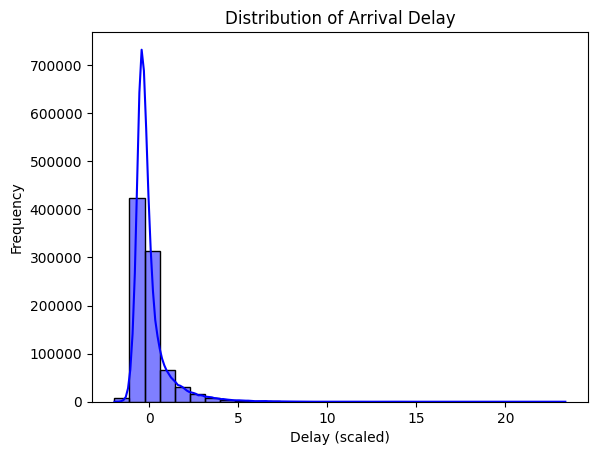

In [1054]:
sns.histplot(merged_data['arr_delay'], bins=30, kde=True, color='blue')
plt.title('Distribution of Arrival Delay')
plt.xlabel('Delay (scaled)')
plt.ylabel('Frequency')
plt.show()

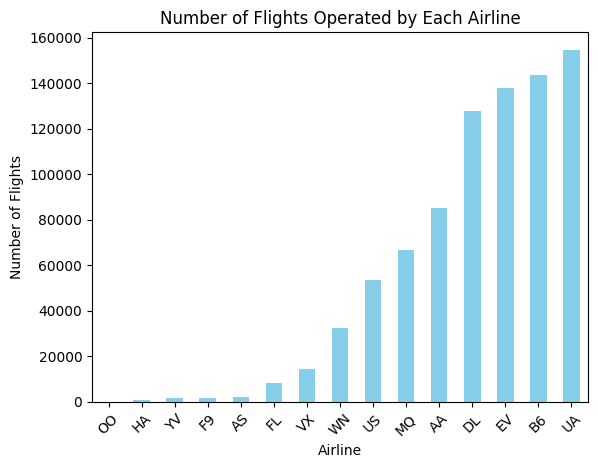

In [1055]:
# Count the number of flights per carrier
carrier_columns = [col for col in merged_data.columns if col.startswith('carrier_')]
flight_counts = merged_data[carrier_columns].sum()
flight_counts.index = flight_counts.index.str.replace('carrier_', '')

flight_counts.sort_values().plot(kind='bar', color='skyblue')
plt.title('Number of Flights Operated by Each Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()

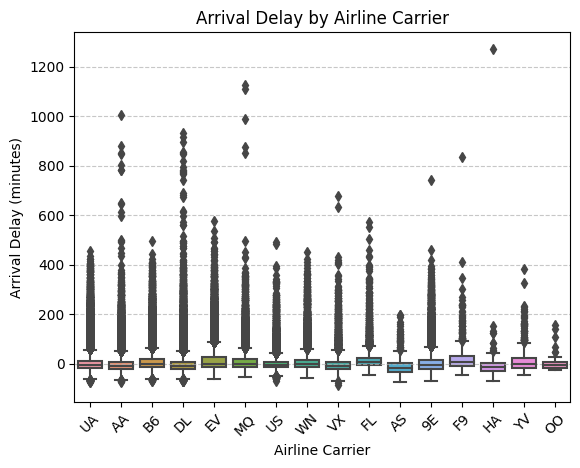

In [1056]:
sns.boxplot(x='carrier', y='arr_delay', data=flights)
plt.title('Arrival Delay by Airline Carrier')
plt.xlabel('Airline Carrier')
plt.ylabel('Arrival Delay (minutes)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

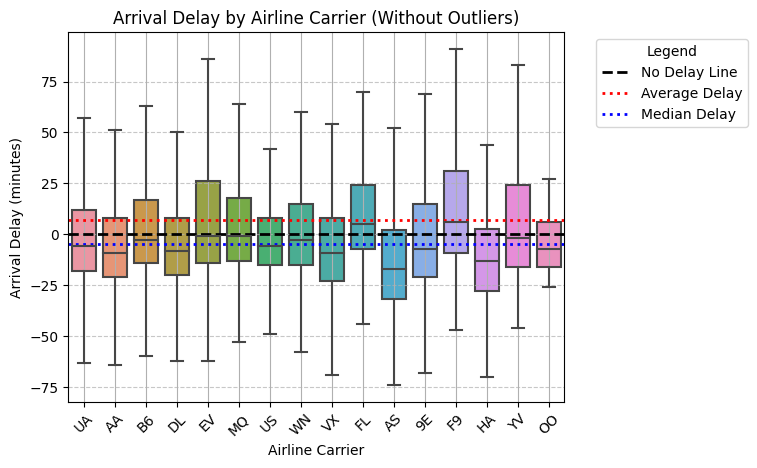

In [1057]:
overall_average_delay_per_month = flights['arr_delay'].mean()
overall_median_delay = flights['arr_delay'].median()
sns.boxplot(x='carrier', y='arr_delay', data=flights, showfliers=False)
plt.title('Arrival Delay by Airline Carrier (Without Outliers)')
plt.xlabel('Airline Carrier')
plt.ylabel('Arrival Delay (minutes)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axhline(y=0, color='black', linewidth=2, linestyle='--', label='No Delay Line')
plt.axhline(y=overall_average_delay_per_month, color='red', linewidth=2, linestyle=':', label='Average Delay')
plt.axhline(y=overall_median_delay, color='blue', linewidth=2, linestyle=':', label='Median Delay')
plt.grid(True)
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

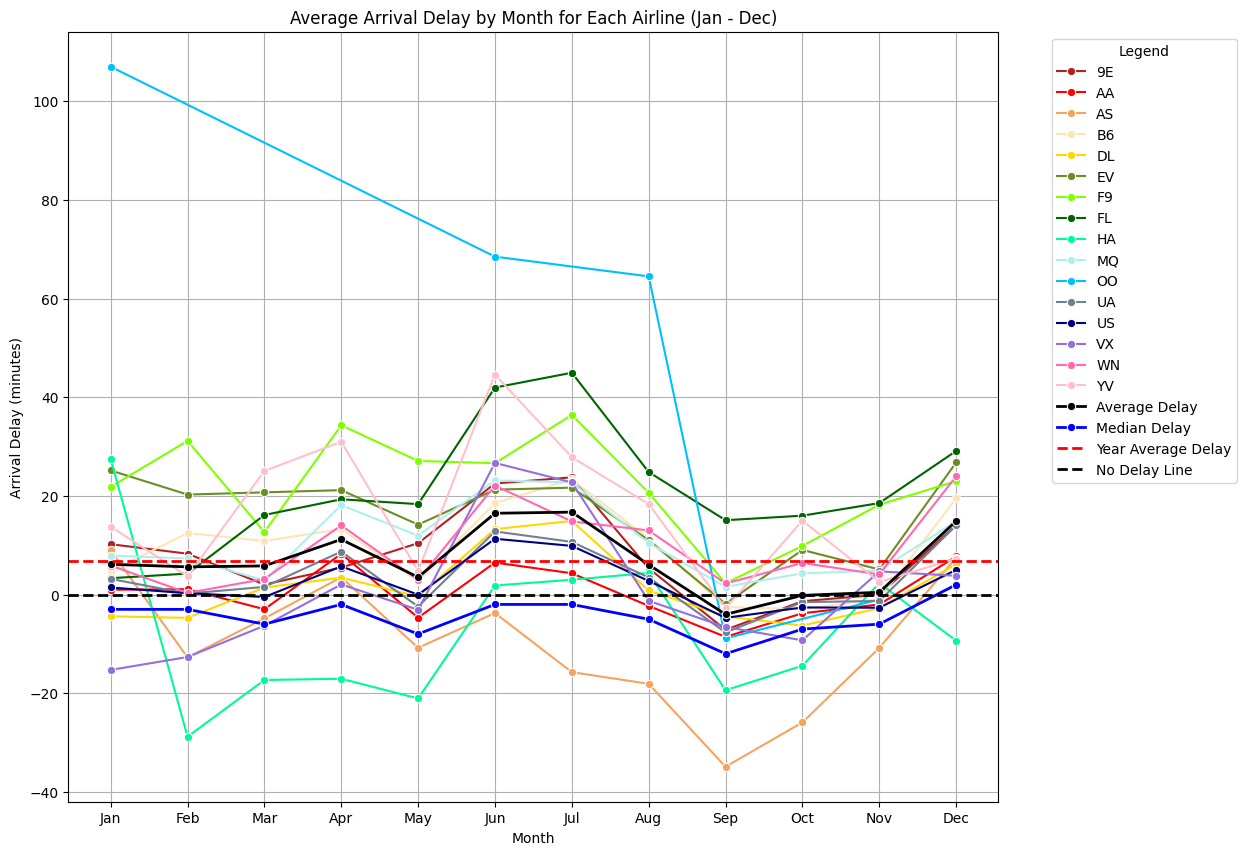

In [1058]:
month_mapping = {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12}
flights['month_numeric'] = flights['month'].map(month_mapping)
average_delay_per_month = (flights.groupby(['month_numeric', 'carrier'])['arr_delay'].mean().reset_index())
overall_average_delay_per_month = (flights.groupby('month_numeric')['arr_delay'].mean().reset_index().rename(columns={'arr_delay': 'overall_avg_delay'}))
overall_median_delay_per_month = (flights.groupby('month_numeric')['arr_delay'].median().reset_index().rename(columns={'arr_delay': 'overall_median_delay'}))
year_average_delay = flights['arr_delay'].mean()
unique_carriers = average_delay_per_month['carrier'].unique()
custom_colors = ['firebrick', 'red', 'sandybrown', 'moccasin', 'gold', 'olivedrab', 
                 'chartreuse', 'darkgreen', 'mediumspringgreen', 'paleturquoise', 
                 'deepskyblue', 'slategray', 'navy', 'mediumpurple', 'hotpink', 'pink']

plt.figure(figsize=(12, 10))
for i, carrier in enumerate(unique_carriers):
    sns.lineplot(data=average_delay_per_month[average_delay_per_month['carrier'] == carrier],
                 x='month_numeric',
                 y='arr_delay',
                 color=custom_colors[i],
                 marker='o',
                 label=carrier)
sns.lineplot(data=overall_average_delay_per_month, x='month_numeric', y='overall_avg_delay', color='black', marker='o', label='Average Delay', linewidth=2)
sns.lineplot(data=overall_median_delay_per_month, x='month_numeric', y='overall_median_delay', color='blue', marker='o', label='Median Delay', linewidth=2)
plt.axhline(y=year_average_delay, color='red', linestyle='--', label='Year Average Delay', linewidth=2)
plt.title('Average Arrival Delay by Month for Each Airline (Jan - Dec)')
plt.xlabel('Month')
plt.ylabel('Arrival Delay (minutes)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.axhline(y=0, color='black', linewidth=2, linestyle='--', label='No Delay Line')
plt.grid(True)
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

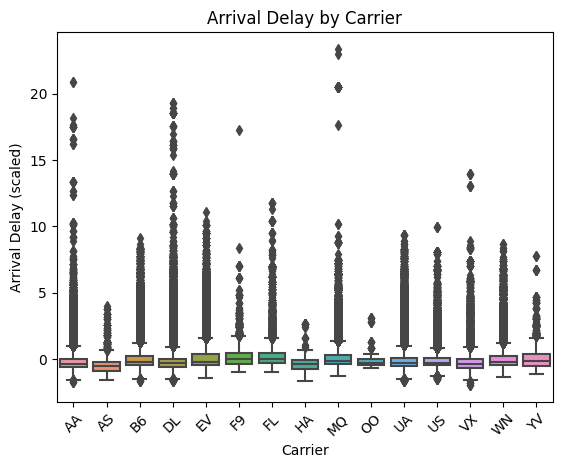

In [1059]:
# select only the carrier dummy columns
carrier_cols = [col for col in merged_data.columns if col.startswith("carrier_")]
df_carrier = merged_data[carrier_cols + ['arr_delay']]
# melt the data
df_carrier_melted = df_carrier.melt(id_vars=['arr_delay'], var_name='carrier', value_name='indicator')
df_carrier_melted = df_carrier_melted[df_carrier_melted['indicator'] == 1]
df_carrier_melted['carrier'] = df_carrier_melted['carrier'].str.replace("carrier_", "")

sns.boxplot(x='carrier', y='arr_delay', data=df_carrier_melted)
plt.title('Arrival Delay by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Arrival Delay (scaled)')
plt.xticks(rotation=45)
plt.show()

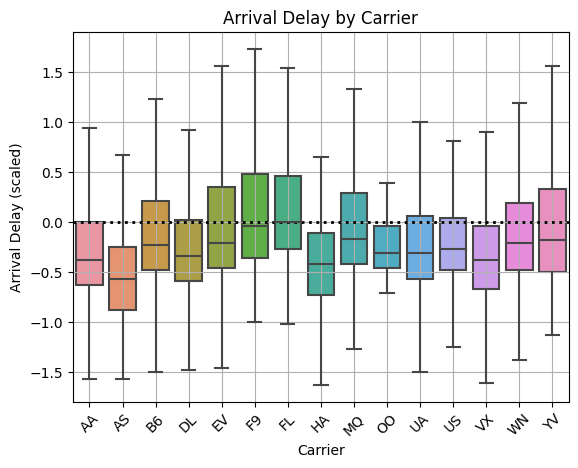

In [1060]:
# select only the carrier dummy columns
carrier_cols = [col for col in merged_data.columns if col.startswith("carrier_")]
df_carrier = merged_data[carrier_cols + ['arr_delay']]
# melt the data
df_carrier_melted = df_carrier.melt(id_vars=['arr_delay'], var_name='carrier', value_name='indicator')
df_carrier_melted = df_carrier_melted[df_carrier_melted['indicator'] == 1]
df_carrier_melted['carrier'] = df_carrier_melted['carrier'].str.replace("carrier_", "")

sns.boxplot(x='carrier', y='arr_delay', data=df_carrier_melted, showfliers=False)
plt.title('Arrival Delay by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Arrival Delay (scaled)')
plt.axhline(y=0, color='black', linewidth=2, linestyle=':', label='Average Delay Line')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

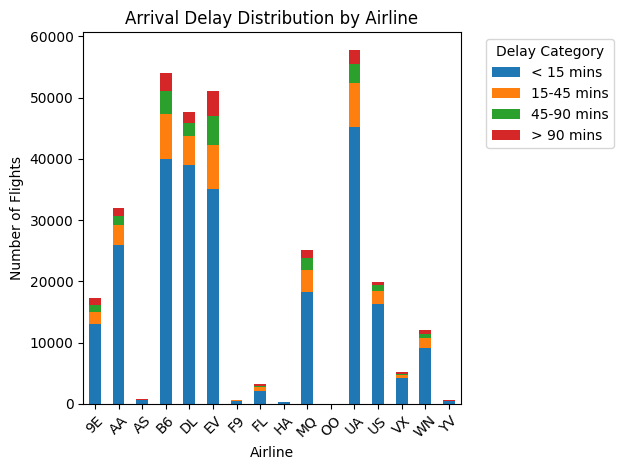

In [1061]:
delay_bins = [-float('inf'), 15, 45, 90, float('inf')]
delay_labels = ['< 15 mins', '15-45 mins', '45-90 mins', '> 90 mins']
flights['delay_category'] = pd.cut(flights['arr_delay'], bins=delay_bins, labels=delay_labels)
delay_counts = flights.groupby(['carrier', 'delay_category']).size().unstack(fill_value=0)
delay_counts.plot(kind='bar', stacked=True)
plt.title('Arrival Delay Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.legend(title='Delay Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

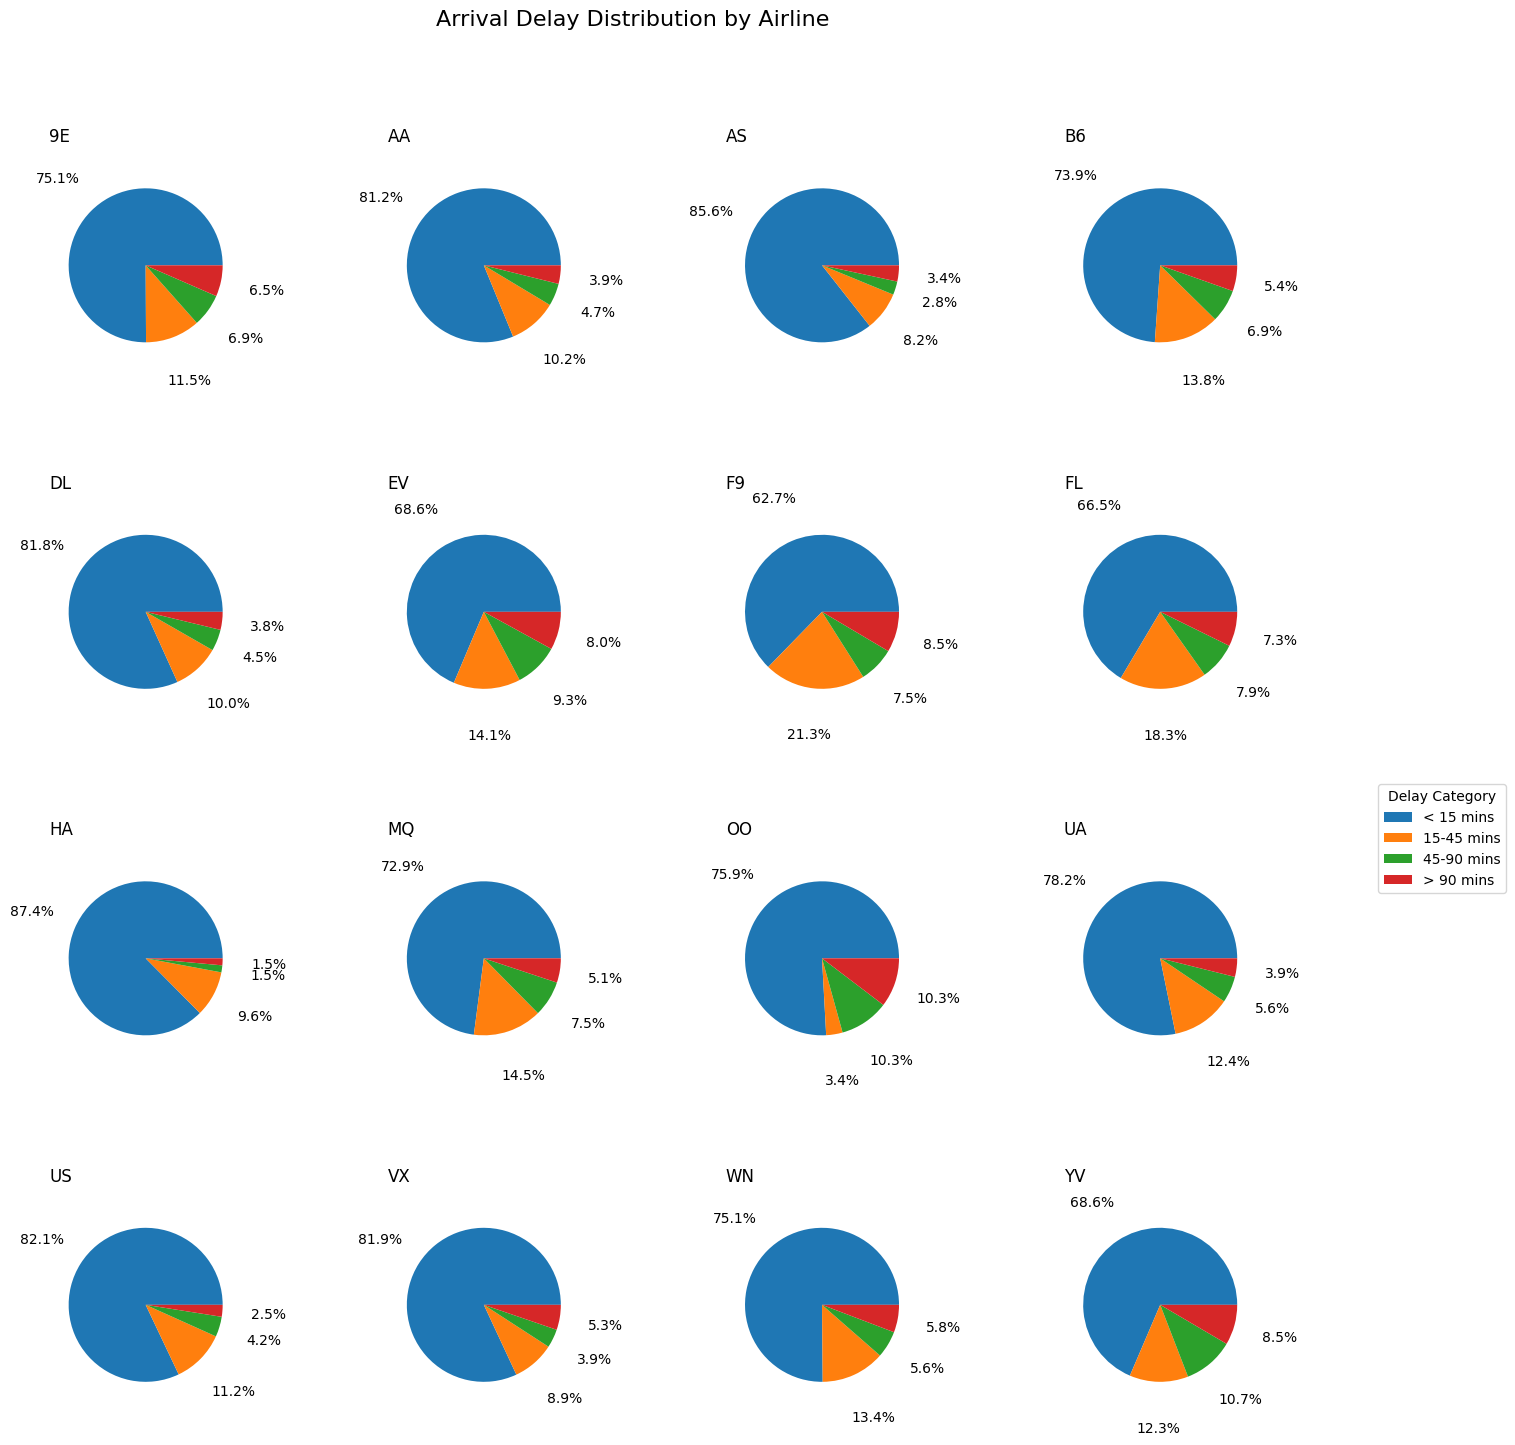

In [1062]:
delay_bins = [-float('inf'), 15, 45, 90, float('inf')]
delay_labels = ['< 15 mins', '15-45 mins', '45-90 mins', '> 90 mins']
flights['delay_category'] = pd.cut(flights['arr_delay'], bins=delay_bins, labels=delay_labels)

delay_counts = flights.groupby(['carrier', 'delay_category']).size().unstack(fill_value=0)

fig, axes = plt.subplots(4, 4, figsize=(16, 16), subplot_kw=dict(aspect="equal"))
axes = axes.flatten()
for i, (carrier, counts) in enumerate(delay_counts.iterrows()):
    ax = axes[i]
    wedges, texts, autotexts = ax.pie(counts, labels=None, autopct='%1.1f%%', pctdistance=1.6, labeldistance=1.5)
    ax.set_title(carrier, fontsize=12, loc='left', pad=20)
fig.legend(wedges, delay_labels, title='Delay Category', bbox_to_anchor=(1.05, 0.5))
plt.suptitle('Arrival Delay Distribution by Airline', fontsize=16)
plt.subplots_adjust(wspace=0.5, hspace=0.8)
plt.show()

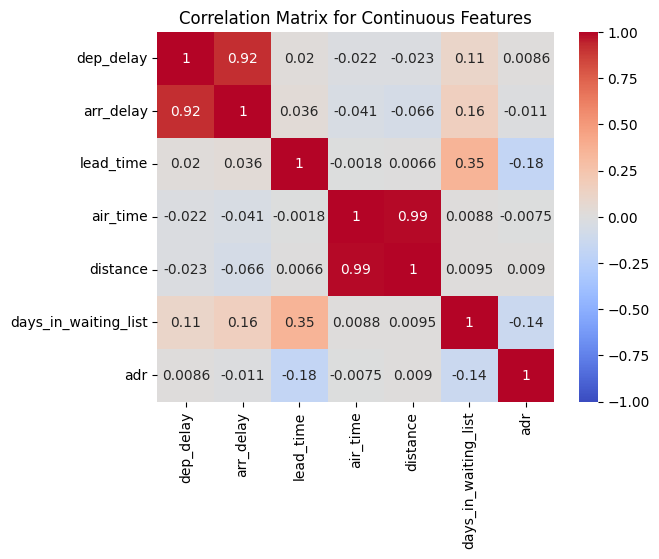

In [1063]:
sns.heatmap(merged_data[continuous_features].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Continuous Features')
plt.show()


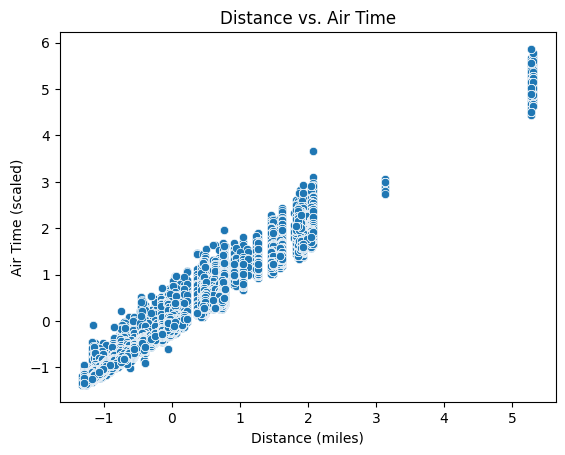

In [1064]:
sns.scatterplot(x='distance', y='air_time', data=merged_data)
plt.title('Distance vs. Air Time')
plt.xlabel('Distance (miles)')
plt.ylabel('Air Time (scaled)')
plt.show()

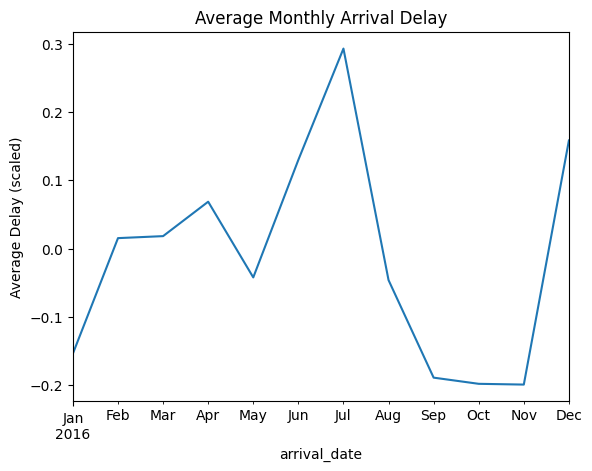

In [1065]:
merged_data.set_index('arrival_date', inplace=True)
merged_data['arr_delay'].resample('M').mean().plot(title='Average Monthly Arrival Delay')
plt.ylabel('Average Delay (scaled)')
plt.show()

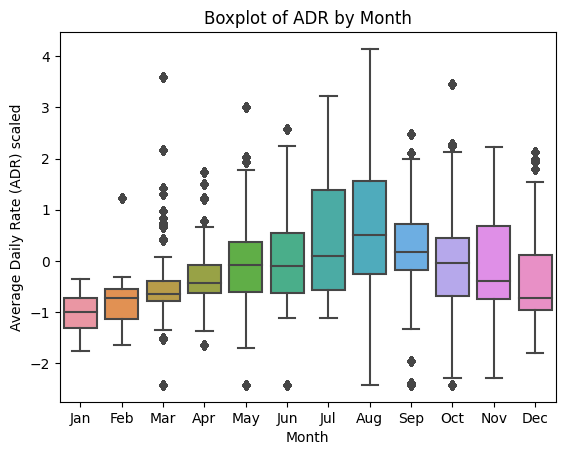

In [1066]:
sns.boxplot(x='month', y='adr', data=merged_data)

plt.title('Boxplot of ADR by Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR) scaled')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

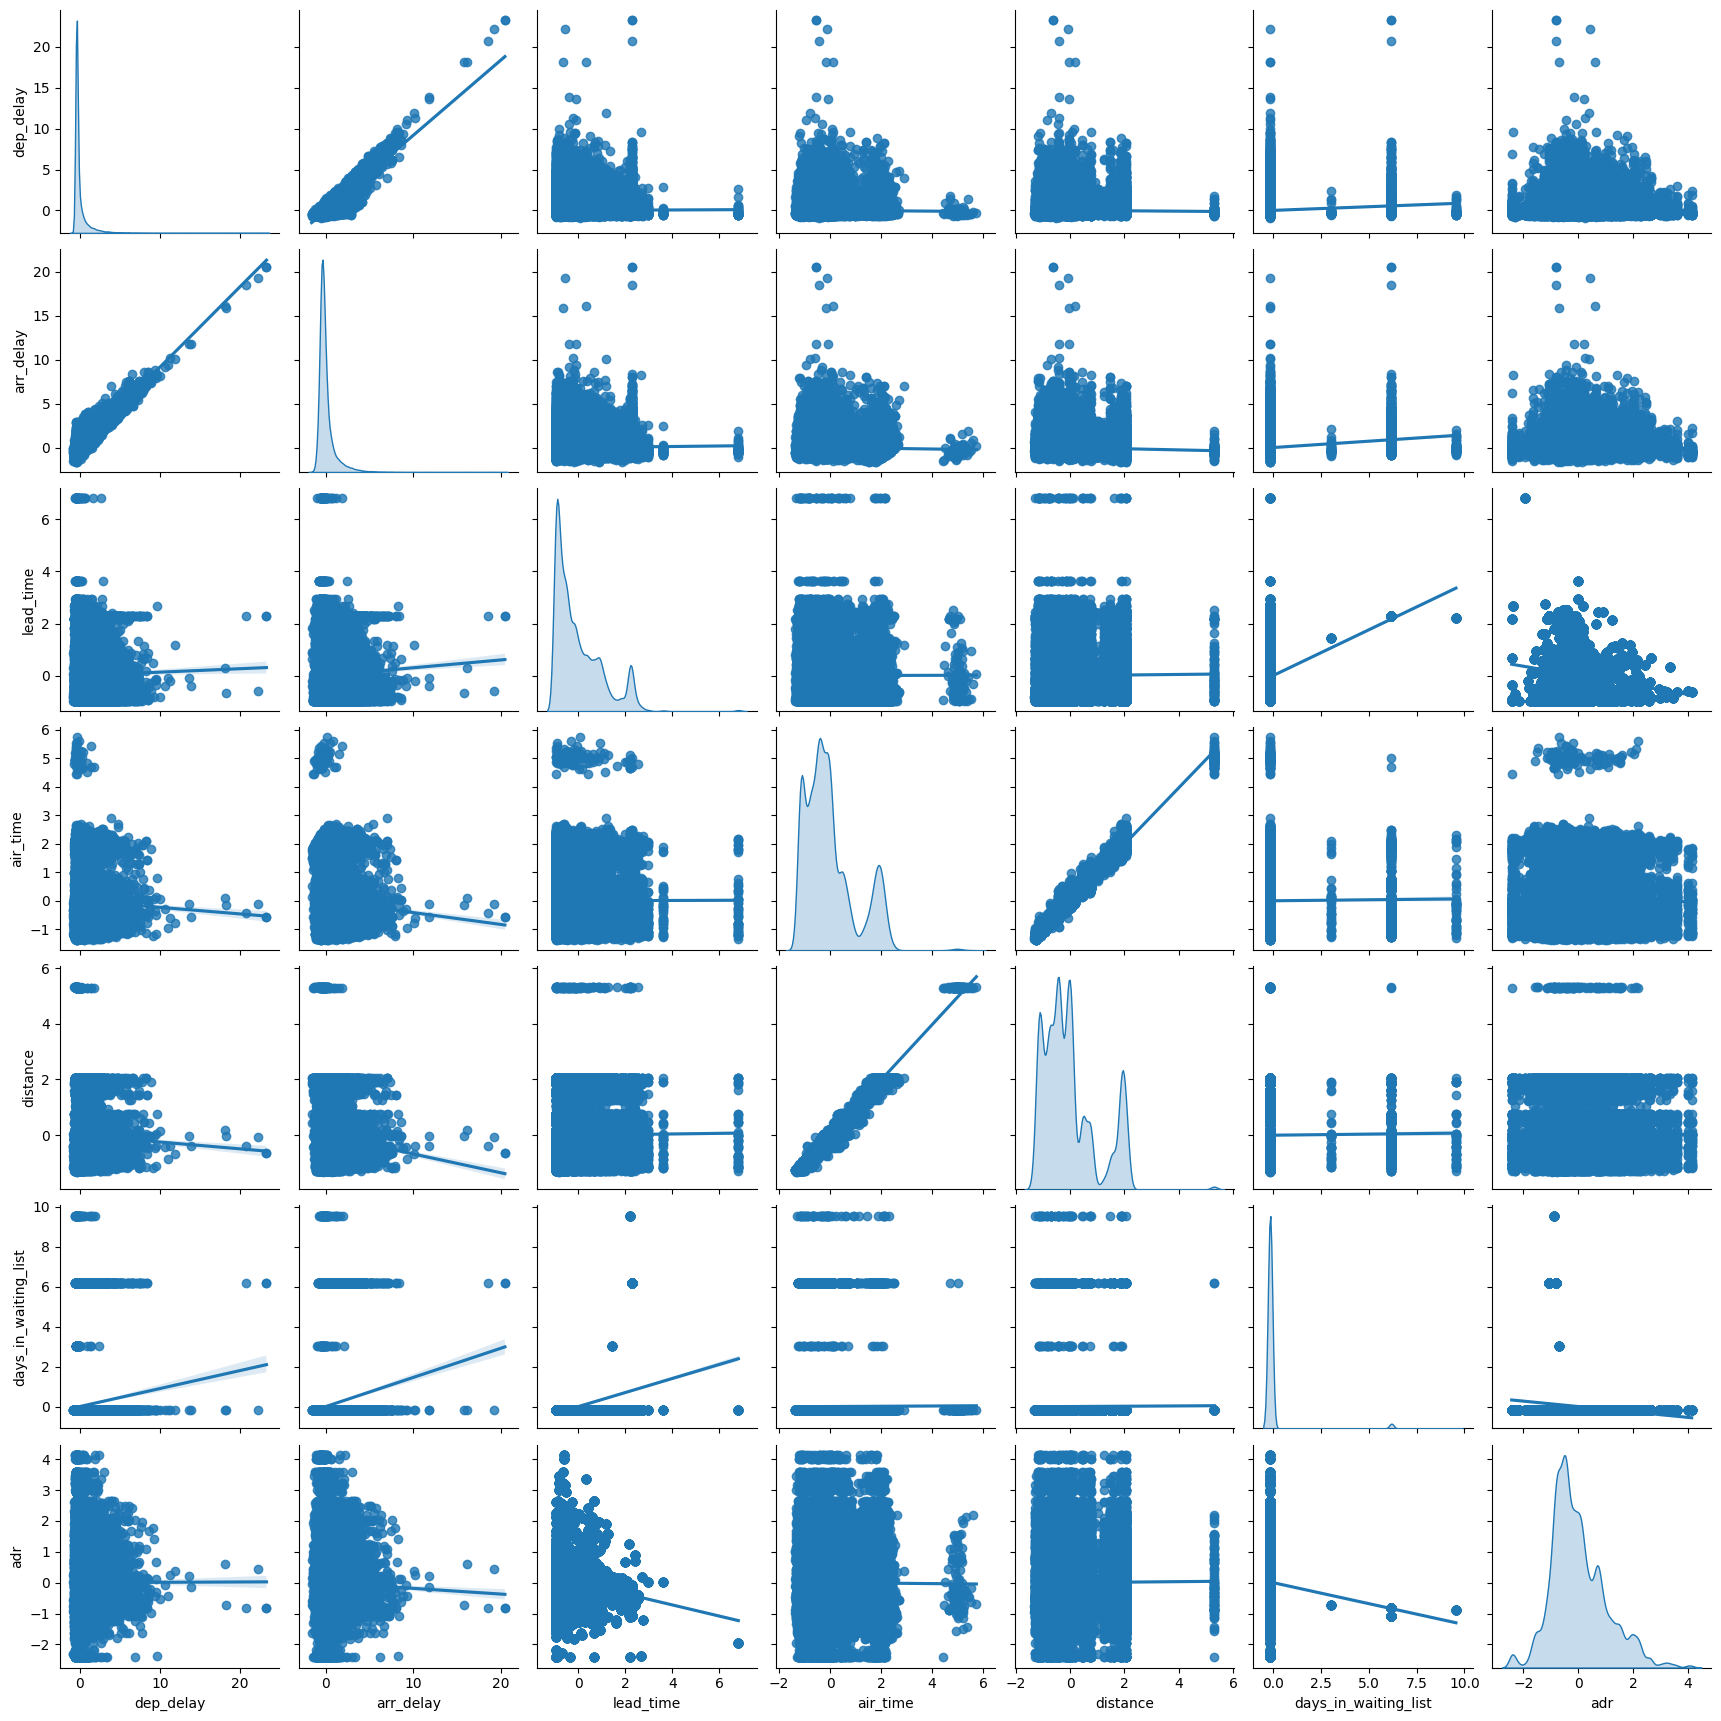

In [1067]:
sample_data = merged_data.sample(frac=0.05)
numeric_cols = sample_data[continuous_features].dropna()
numeric_cols_cleaned = numeric_cols.replace([np.inf, -np.inf], np.nan).dropna()
numeric_cols = numeric_cols.reset_index(drop=True)
sns.pairplot(numeric_cols_cleaned, kind='reg', diag_kind='kde')

In [1068]:
print(numeric_cols.dtypes)
print(numeric_cols.isnull().sum())
np.isinf(numeric_cols).sum()

dep_delay               float64
arr_delay               float64
lead_time               float64
air_time                float64
distance                float64
days_in_waiting_list    float64
adr                     float64
dtype: object
dep_delay               0
arr_delay               0
lead_time               0
air_time                0
distance                0
days_in_waiting_list    0
adr                     0
dtype: int64


dep_delay               0
arr_delay               0
lead_time               0
air_time                0
distance                0
days_in_waiting_list    0
adr                     0
dtype: int64

## Part 2: Answer questions from the proposals (8 points)

Each plot should be followed by a paragraph of explanation and observation.

### Creator: FIRSTNAME LASTNAME

#### Question: How do weekday and weekend patterns differ for flights and hotel stays?

#### Answer:

### Interpreter 1: Conor Jones

#### Question: What is the association between lead time and cancellation for hotels?

#### Answer:

### Interpreter 2: Daniel Xu

#### Question: How do airlines compare on scheduling accuracy?

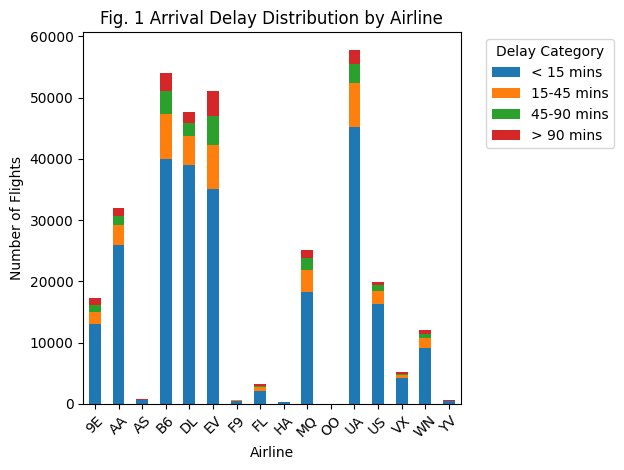

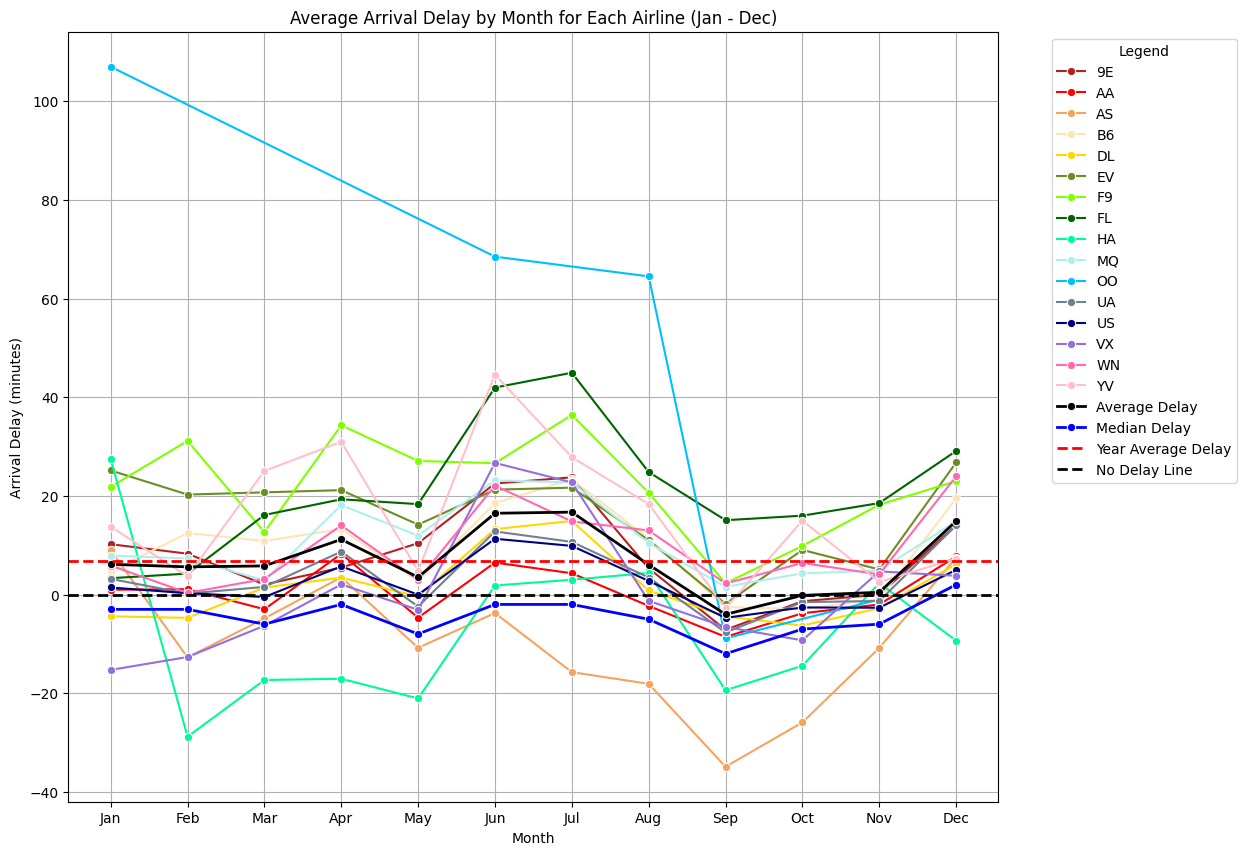

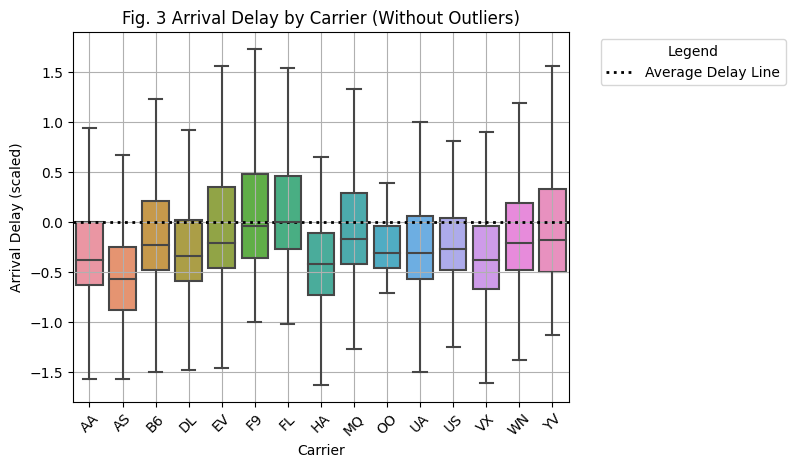

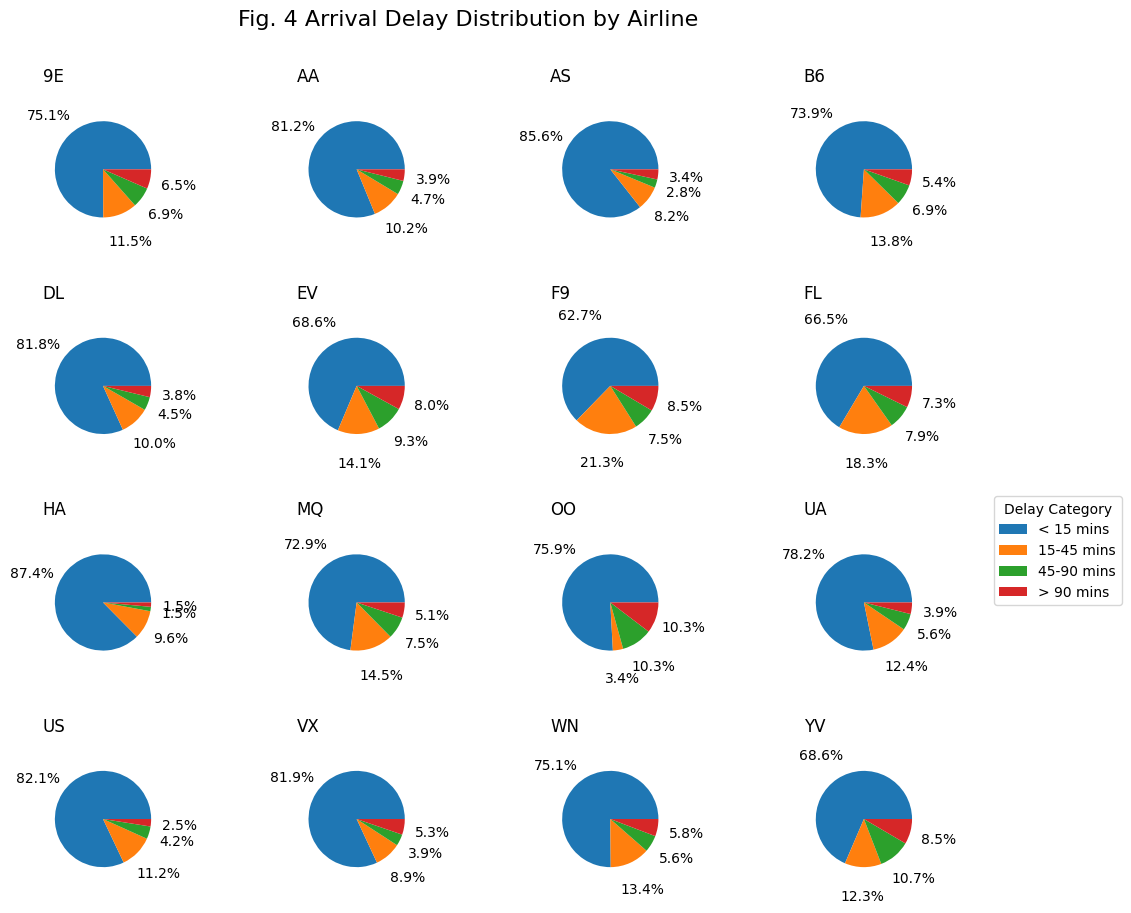

In [1069]:
#Useful visualizations
#Barchart
delay_bins = [-float('inf'), 15, 45, 90, float('inf')]
delay_labels = ['< 15 mins', '15-45 mins', '45-90 mins', '> 90 mins']
flights['delay_category'] = pd.cut(flights['arr_delay'], bins=delay_bins, labels=delay_labels)
delay_counts = flights.groupby(['carrier', 'delay_category']).size().unstack(fill_value=0)
delay_counts.plot(kind='bar', stacked=True)
plt.title('Fig. 1 Arrival Delay Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.legend(title='Delay Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Linechart
month_mapping = {1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12}
flights['month_numeric'] = flights['month'].map(month_mapping)
average_delay_per_month = (flights.groupby(['month_numeric', 'carrier'])['arr_delay'].mean().reset_index())
overall_average_delay_per_month = (flights.groupby('month_numeric')['arr_delay'].mean().reset_index().rename(columns={'arr_delay': 'overall_avg_delay'}))
overall_median_delay_per_month = (flights.groupby('month_numeric')['arr_delay'].median().reset_index().rename(columns={'arr_delay': 'overall_median_delay'}))
year_average_delay = flights['arr_delay'].mean()
unique_carriers = average_delay_per_month['carrier'].unique()
custom_colors = ['firebrick', 'red', 'sandybrown', 'moccasin', 'gold', 'olivedrab', 
                 'chartreuse', 'darkgreen', 'mediumspringgreen', 'paleturquoise', 
                 'deepskyblue', 'slategray', 'navy', 'mediumpurple', 'hotpink', 'pink']

plt.figure(figsize=(12, 10))
for i, carrier in enumerate(unique_carriers):
    sns.lineplot(data=average_delay_per_month[average_delay_per_month['carrier'] == carrier],
                 x='month_numeric',
                 y='arr_delay',
                 color=custom_colors[i],
                 marker='o',
                 label=carrier)
sns.lineplot(data=overall_average_delay_per_month, x='month_numeric', y='overall_avg_delay', color='black', marker='o', label='Average Delay', linewidth=2)
sns.lineplot(data=overall_median_delay_per_month, x='month_numeric', y='overall_median_delay', color='blue', marker='o', label='Median Delay', linewidth=2)
plt.axhline(y=year_average_delay, color='red', linestyle='--', label='Year Average Delay', linewidth=2)
plt.title('Average Arrival Delay by Month for Each Airline (Jan - Dec)')
plt.xlabel('Month')
plt.ylabel('Arrival Delay (minutes)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.axhline(y=0, color='black', linewidth=2, linestyle='--', label='No Delay Line')
plt.grid(True)
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#Boxplots
# select only the carrier dummy columns
carrier_cols = [col for col in merged_data.columns if col.startswith("carrier_")]
df_carrier = merged_data[carrier_cols + ['arr_delay']]
# melt the data
df_carrier_melted = df_carrier.melt(id_vars=['arr_delay'], var_name='carrier', value_name='indicator')
df_carrier_melted = df_carrier_melted[df_carrier_melted['indicator'] == 1]
df_carrier_melted['carrier'] = df_carrier_melted['carrier'].str.replace("carrier_", "")

sns.boxplot(x='carrier', y='arr_delay', data=df_carrier_melted, showfliers=False)
plt.title('Fig. 3 Arrival Delay by Carrier (Without Outliers)')
plt.xlabel('Carrier')
plt.ylabel('Arrival Delay (scaled)')
plt.axhline(y=0, color='black', linewidth=2, linestyle=':', label='Average Delay Line')
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#Piecharts
delay_bins = [-float('inf'), 15, 45, 90, float('inf')]
delay_labels = ['< 15 mins', '15-45 mins', '45-90 mins', '> 90 mins']
flights['delay_category'] = pd.cut(flights['arr_delay'], bins=delay_bins, labels=delay_labels)
delay_counts = flights.groupby(['carrier', 'delay_category']).size().unstack(fill_value=0)

fig, axes = plt.subplots(4, 4, figsize=(12, 10), subplot_kw=dict(aspect="equal"))
axes = axes.flatten()
for i, (carrier, counts) in enumerate(delay_counts.iterrows()):
    ax = axes[i]
    wedges, texts, autotexts = ax.pie(counts, labels=None, autopct='%1.1f%%', pctdistance=1.6, labeldistance=1.5)
    ax.set_title(carrier, fontsize=12, loc='left', pad=20)
fig.legend(wedges, delay_labels, title='Delay Category', bbox_to_anchor=(1.05, 0.5))
plt.suptitle('Fig. 4 Arrival Delay Distribution by Airline', fontsize=16)
plt.subplots_adjust(wspace=0.5, hspace=0.8)
plt.show()

#### Answer:

In our flight dataset, we had several choices to measure "scheduling accuracy". For example, the difference between the scheduled departure time and the actual departure time, or the actual airtime vs the expected airtime (calculated with the difference between expected arrival and expected departure) to name a couple. In the end, we decided to explore the scheduling accuracy concerning the arrival time, since this is arguably the most important focus for scheduling. It wouldn't matter if a flight departed early or traveled from origin to destination in less time than expected if the flight still arrived late. To explore scheduling accuracy, we created several data visualizations for our flight dataset, namely Stacked Bar Charts, a Line Chart, Boxplots, and pie charts.

First, let's take a look at the Stacked Bar Charts. Since we want to explore how airlines -a categorical variable- compare on scheduling accuracy, we made our bars correspond to each airline. Next, we thought it would be insightful to separate delays into groups by how serious they are since a 30-minute delay should be distinguished from a 120-minute delay. Furthermore, since the United States Federal Aviation Administration considers a flight to be delayed when it is 15 minutes later than its scheduled time, the lowest delay category is "< 15". With the Stacked Bar Charts, we observe that there are no extremities with regard to scheduling accuracy. Although we don't have an exact proportion for each delay category, the general pattern shows most arrivals less than 15 minutes late and fewer arrivals later than 15 minutes, 45 minutes, 90 minutes. However, a more apparent observation that also remains important is the non-uniform distribution. Some airlines such as UA, B6, and DL have many more flight records than other airlines, so their arrival performance will have greater weight and influence when it comes to entire data-set averages.

In the Boxplots, we can see how each airline performs concerning the average. The data has been scaled by mean and standard deviation using the StandardScaler, so easier to grasp airline comparisons with each other. Many airlines have most flights with less delay than the average, but it should be noted that because the mean is not resistant to outliers, extreme outliers could skew the mean to become greater. Regardless, from the boxplots, appears we have a better visualization for comparing performance between airlines, as arrival delays are side-by-side. From the boxplots, it seems airlines such as AS, HA, and VX perform better with their 3rd quartile lines under the average, indicating that they perform better than most airlines concerning arrival delay.

However, looking at all of the airline arrivals from the year may overlook an aspect: the date. Some airlines may perform better in one month while another airline performs better in another month. To explore this, we created a line chart for arrival delays throughout the months. Each airline has a line and its average delay by month is plotted. We also plotted lines for the average delay per month, median delay per month, no delay (at 0 minutes), and average delay for the year. From the line chart, overall, it appears that airlines perform worse in the summer months: June, July, and August, with many airlines having average arrival delays greater than the year average. The average delay by month reflects this as well as it's mostly below the year average during most of the other months, but increases during June and July. Once again, the median is lower than the mean, most likely because of outliers. Airline 'OO' only has data from January, June, August, September, and November, which explains its irregular line plot without points at every month. From the line plot, it looks like HA, AS, and AA performed better throughout the months with their monthly averages below monthly averages for all airlines combined. But the line plot fails to show an exact proportion of flights falling in a particular delay range, a problem that also arose from Stacked Bar Charts.

Finally, we created Pie Charts for each airline's arrival delay. Because the mean is not resistant to outliers, that means a few extremely long delays could lead to a mostly on-time airline having a greater average and ranking lower, even though in most cases, delays are not common. With Pie Charts, we once again separate our delays into groups. This time, instead of counting, we did it by proportion. From the Pie Charts, we observe HA, AS, and US have the greatest proportion of "on-time" arrivals with 87.4%, 85.6%, and 82.1% respectively. Still, there are other factors to consider depending on context. For example, if one has a longer layover and can afford a longer delay, they may prefer US over AS. Even though US has 82.1% of "on-time" arrivals compared with 85.6% of AS, US has 97.5% under 90 minutes while AS has 96.6% under 90 minutes.

In conclusion, there are many factors and visualizations we can use to explore how airline scheduling accuracy compares. Focusing on the Barchart, Line chart, Boxplots, and Pie Charts above, HA and AS arguably perform better.

### Deliverer: Sichen Li

#### Question: Which is the best month to travel to avoid the peak season?

#### Answer:

## Part 3: Follow-up Questions (4 points)

### New Questions Based Off Initial Investigation

- Q1: How can we plan the best vacation in the summer to minimize delay and cost? (Which airline has least delay and how far in advance to book hotel (lead time) to minimize adr in the summer)
- Q2: WRITE_QUESTION_HERE

## Summary (2 points)

GIVE A 2 PARAGRAPH SUMMARY. 

PARAGRAPH 1 SHOULD DESCRIBE WHAT YOU LEARNED ABOUT YOUR DATA FROM INVESTIGATING THE INITIAL QUESTIONS. DID YOU FIND ANYTHING UNUSUAL IN YOUR DATA? DID ANYTHING SURPRISE YOU? WHICH OF THE INITIAL QUESTIONS WERE HELPFUL IN LEADING YOU TO MORE QUESTIONS?

PARAGRAPH 2 SHOULD SUMMARIZE WHAT YOU LEARNED FROM INVESTIGATING THE FOLLOW-UP QUESTIONS. WHY ARE THESE FOLLOW-UP QUESTIONS INTERESTING FOR INVESTIGATION? DESCRIBE THE TABLES/FIGURES YOU USED TO EXPLORE ANSWERS TO THESE FOLLOW-UP QUESTIONS? WHAT DID YOU LEARN FROM THE TABLES/FIGURES REGARDING THE FOLLOW-UP QUESTIONS YOU PROPOSED?